In [1]:
import sys,os
os.environ["CUDA_VISIBLE_DEVICES"] = "0"
import torch
import imageio
import numpy as np

import matplotlib.pyplot as plt
import cv2
import os
# sys.path.append('../')

In [2]:
from model.main import DepthNetModule

from utils.io import prepare_input_image

In [3]:
# Load the model checkpoint
model_path = 'checkpoints/NYUBestScaleInv10Full.ckpt'
model = DepthNetModule.load_from_checkpoint(model_path)
model.eval()
model = model.to('cuda')

Using cache found in /home/ashkanganj/.cache/torch/hub/facebookresearch_dinov2_main
/home/ashkanganj/.cache/torch/hub/facebookresearch_dinov2_main/dinov2/layers/swiglu_ffn.py:51: UserWarning: xFormers is not available (SwiGLU)
  warnings.warn("xFormers is not available (SwiGLU)")
/home/ashkanganj/.cache/torch/hub/facebookresearch_dinov2_main/dinov2/layers/attention.py:33: UserWarning: xFormers is not available (Attention)
  warnings.warn("xFormers is not available (Attention)")
/home/ashkanganj/.cache/torch/hub/facebookresearch_dinov2_main/dinov2/layers/block.py:40: UserWarning: xFormers is not available (Block)
  warnings.warn("xFormers is not available (Block)")
/home/ashkanganj/anaconda3/envs/torch/lib/python3.10/site-packages/torchvision/models/_utils.py:135: UserWarning: Using 'weights' as positional parameter(s) is deprecated since 0.13 and may be removed in the future. Please use keyword parameter(s) instead.
  warnings.warn(
/home/ashkanganj/anaconda3/envs/torch/lib/python3.10/

Loaded DFV model
Loading weights:  None


Using cache found in /home/ashkanganj/.cache/torch/hub/rwightman_gen-efficientnet-pytorch_master


In [4]:
data_dir = '/home/ashkanganj/workspace/PrecisionDepthFocus/server/imgs'
focal_stack, rgb_img, focus_dist = prepare_input_image(data_dir)

Focal stack shape: torch.Size([1, 5, 3, 480, 640])
RGB image shape: torch.Size([1, 3, 480, 640])
Focus distances shape: torch.Size([1, 5])


In [5]:
# Disable gradient computation for inference (reduces memory usage and speeds up computation)
with torch.no_grad():
   out = model(rgb_img, focal_stack, focus_dist)

metric_depth = out[0].squeeze().cpu().numpy()

/home/ashkanganj/anaconda3/envs/torch/lib/python3.10/site-packages/torch/nn/modules/conv.py:456: UserWarning: Applied workaround for CuDNN issue, install nvrtc.so (Triggered internally at /opt/conda/conda-bld/pytorch_1695392020201/work/aten/src/ATen/native/cudnn/Conv_v8.cpp:80.)
  return F.conv2d(input, weight, bias, self.stride,
/home/ashkanganj/anaconda3/envs/torch/lib/python3.10/site-packages/torch/nn/functional.py:3769: UserWarning: nn.functional.upsample is deprecated. Use nn.functional.interpolate instead.
  warnings.warn("nn.functional.upsample is deprecated. Use nn.functional.interpolate instead.")


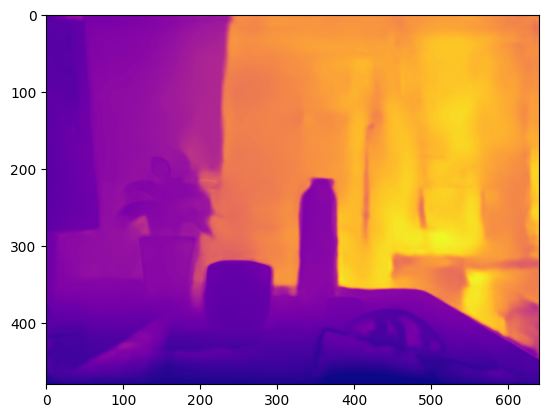

In [6]:
plt.imshow(metric_depth, cmap='plasma')